# <center>Linear Regression – Class Assessment

### Importing Libraries & Understanding Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
import statsmodels.api as sm
%matplotlib inline

In [2]:
os.chdir("D:/Imarticus/Exam section/Assesment/Linear Regression using Python")
df=pd.read_csv('D:/Imarticus/Exam section/Assesment/Linear Regression using Python/Fish_dataset.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.1+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
# Let's Check the missing data if any 
# Gives the list of columns which have only null values
df.columns[df.isnull().any()]

Index([], dtype='object')

<h2>Q.1</h2> Plot a bar chart showing count of individual species?

### Solution:

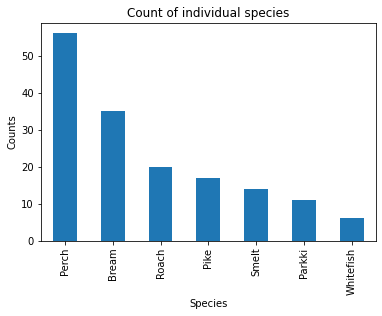

In [6]:
df['Species'].value_counts().plot(kind='bar');
plt.title('Count of individual species')
plt.xlabel('Species')
plt.ylabel('Counts')
plt.show()

#### Checking Skewness through out the weight

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


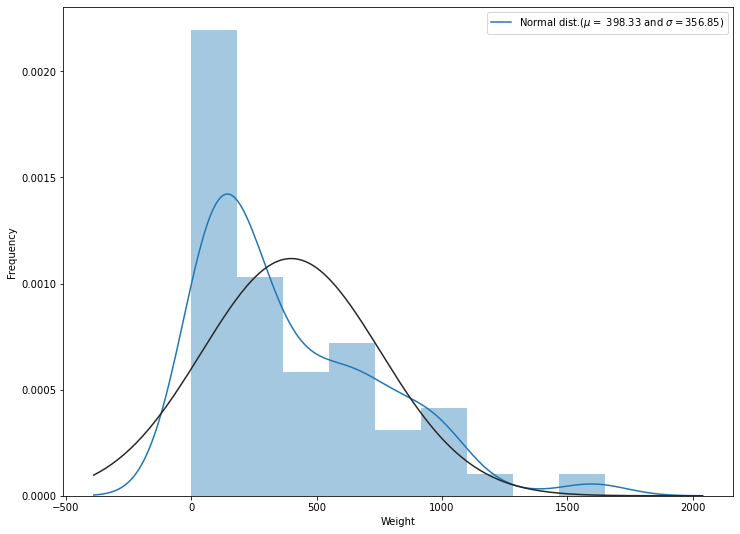

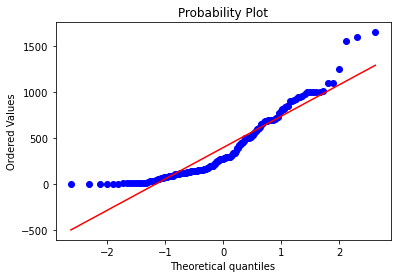

In [7]:
plt.subplots(figsize =(12,9))
sns.distplot(df['Weight'], fit=stats.norm)

# get the fitted parameters used by the function
(mu,sigma)=stats.norm.fit(df['Weight'])

# Plot with the distribution
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

# Probability Plot
fig=plt.figure()
stats.probplot(df['Weight'],plot=plt)
plt.show()

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


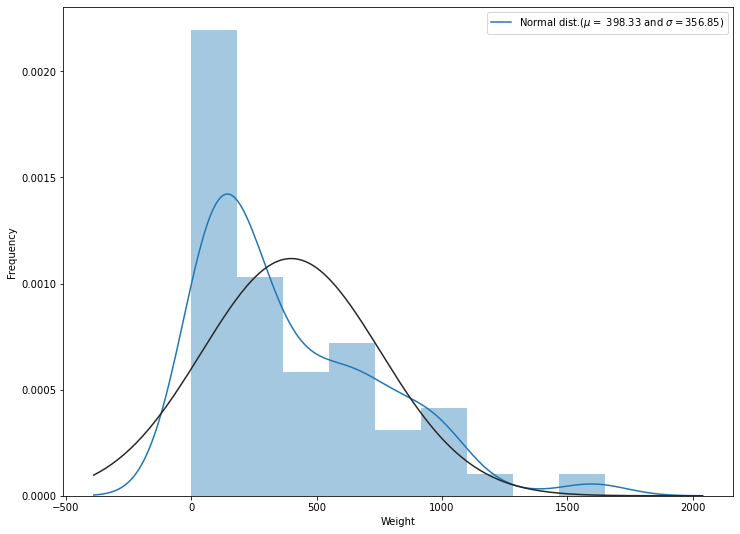

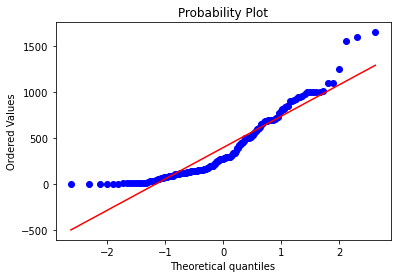

In [8]:
# we use log which is a part of numpy library
#df['Weight']=np.log1p(df['Weight'])

plt.subplots(figsize =(12,9))
sns.distplot(df['Weight'], fit=stats.norm)

# get the fitted parameters used by the function
(mu,sigma)=stats.norm.fit(df['Weight'])

# Plot with the distribution
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

# Probability Plot
fig=plt.figure()
stats.probplot(df['Weight'],plot=plt)
plt.show()

##### Note:-We cannnot use the log transformation as it let weight value from right skewed to left skewed.

<h2>Q.2</h2> Identify outliers and remove if any?

##### Boxplot for a single variable to vizualize outliers

<AxesSubplot:ylabel='Weight'>

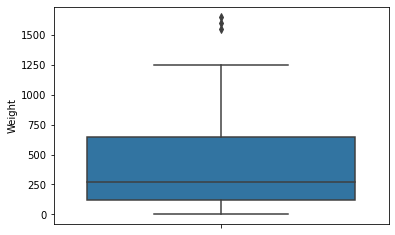

In [9]:
sns.boxplot(y=df.Weight) 

#### Removing Outliers from Weight columns as it will dependent variable for our Model

In [10]:
df[df['Weight']>1250]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [11]:
df.drop([142,143,144],inplace=True)

#### Checking again the outliers in weight Column 

<AxesSubplot:ylabel='Weight'>

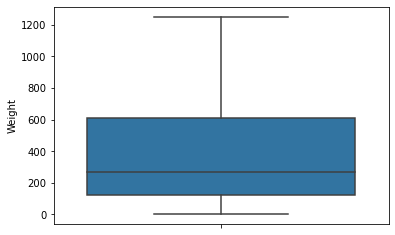

In [12]:
sns.boxplot(y=df.Weight)

<AxesSubplot:ylabel='Length1'>

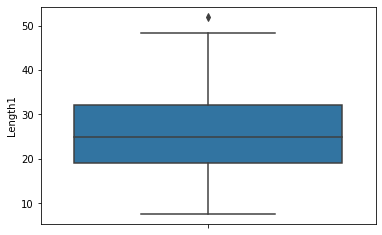

In [13]:
sns.boxplot(y=df.Length1) 

<AxesSubplot:ylabel='Length2'>

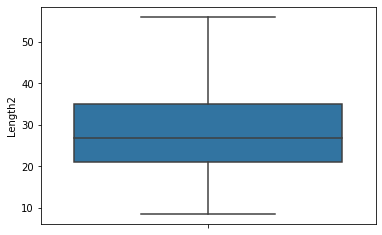

In [14]:
sns.boxplot(y=df.Length2) 

<AxesSubplot:ylabel='Length3'>

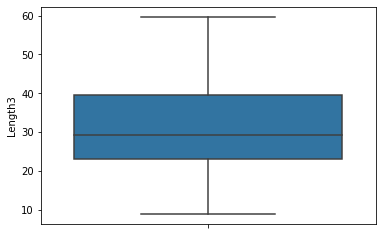

In [15]:
sns.boxplot(y=df.Length3) 

<AxesSubplot:ylabel='Height'>

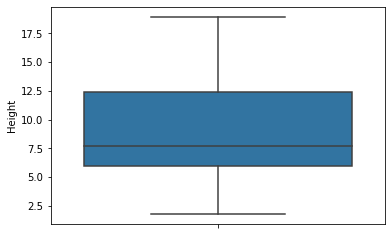

In [16]:
sns.boxplot(y=df.Height) 

<AxesSubplot:ylabel='Width'>

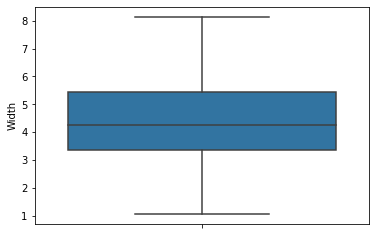

In [17]:
sns.boxplot(y=df.Width) 

<h3>Q.3</h3> Build a regression model and print regression equation?

## Label Encoding

In [18]:
df_cat=df.select_dtypes(include='object').columns # Seperarting categorical Variables

In [19]:
# Label encoding Categorical Variables
for c in df_cat:
    lbl=LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c]=lbl.transform(list(df[c].values))

In [20]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


## Expolarity analysis 

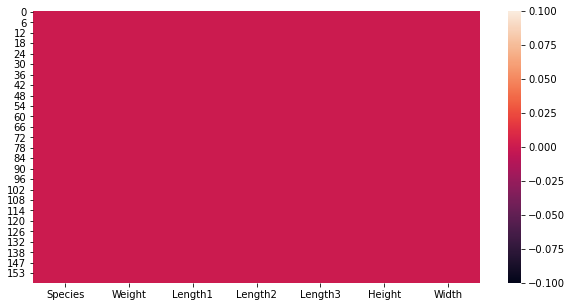

In [21]:
# plot of missing value attributes
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

<AxesSubplot:>

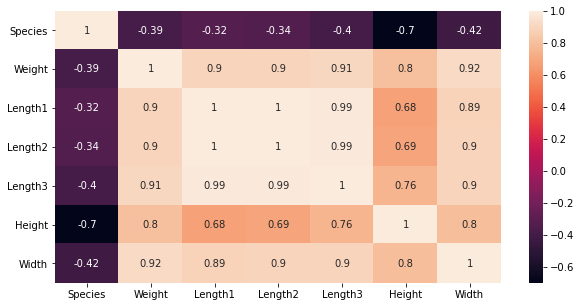

In [22]:
# Correlation Plot
corr=df.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [23]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


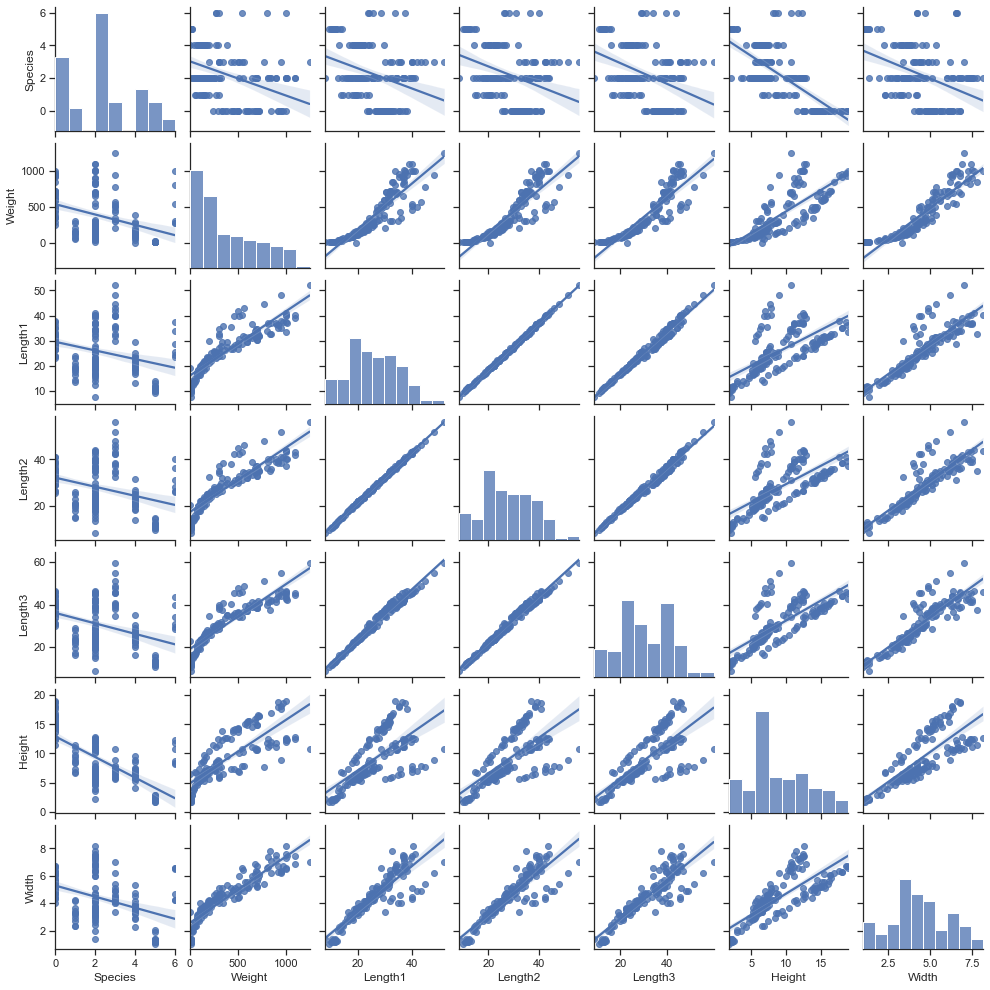

In [24]:
col=['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']
sns.set(style='ticks')
sns.pairplot(df[col],size=2,kind='reg')

## Linear Regression 

In [25]:
# Prepare data for prediction
Y=df['Weight']
X=df.drop(['Weight'],axis=1)

In [26]:
# Take The value as X and Y
x=X.values
y=Y.values

In [27]:
#Split data into train and test format
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [28]:
#perform Linear regression
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
# print the intercept
print(model.intercept_)

-545.731280171173


In [31]:
# Making Prediction using the model
y_pred=model.predict(x_test)

In [32]:
mse=mean_squared_error(y_test,y_pred)
r_sqaured = r2_score(y_test, y_pred)
rmse=sqrt(mse)

In [33]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 8937.30372304706
Root_Mean_Sqaured_Erro: 94.53731391914549
r_sqaure_value: 0.9094623125536654


In [34]:
#Score/Accuracy
print('Accuracy',model.score(x,y)*100)

Accuracy 91.30665995783778


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


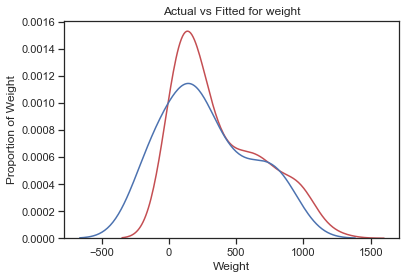

In [35]:
#distribution plot to compare actual vs predicted values for price after few modification.
ax1=sns.distplot(Y,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for weight')
plt.xlabel('Weight')
plt.ylabel('Proportion of Weight')
plt.show()

### Cross validation

In [36]:
Rcross= cross_val_score(model,x_train,y_train,cv=4)
Rcross

array([0.87854608, 0.91497842, 0.87833502, 0.8547691 ])

#### To improve the above model 

#### So, We need Scaling and standardisation for our model as because of different variable units.

### Scaling and standardisation

In [37]:
scale=StandardScaler()

In [38]:
x_sc=scale.fit_transform(df[['Species', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']])

In [39]:
model.sc=model.fit(x_sc,df['Weight'])

In [40]:
yhat_sc=model.predict(x_sc)

In [41]:
print('R Squared using polynomial Regression:',r2_score(df['Weight'],yhat_sc))
print('Mean Squared errorusing Polynomial Regerssion:',mean_squared_error(df['Weight'],yhat_sc))
print('Root mean Squared error using Polynomial Regression:',np.sqrt(mean_squared_error(df['Weight'],yhat_sc)))

R Squared using polynomial Regression: 0.9143222796136548
Mean Squared errorusing Polynomial Regerssion: 8692.494657770327
Root mean Squared error using Polynomial Regression: 93.23354899267927


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


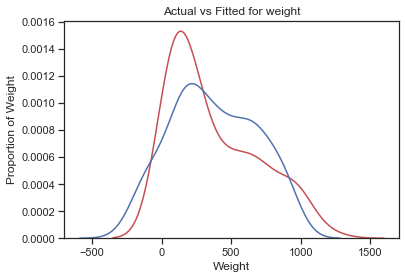

In [42]:
#distribution plot to compare actual vs predicted values for price after few modification.
ax1=sns.distplot(df['Weight'],hist=False,color='r',label='Actual Value')
sns.distplot(yhat_sc,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for weight')
plt.xlabel('Weight')
plt.ylabel('Proportion of Weight')
plt.show()

#### Now we Need to transform the model into Polynomial regresssion

## Polynomial Regression

In [43]:
pr= PolynomialFeatures(degree=2)

In [44]:
train_pr=pr.fit_transform(x_test)

In [45]:
model_pr=model.fit(train_pr,y_test)

In [46]:
yhat_pr=model.predict(train_pr)

In [47]:
yhat_pr[0:5]

array([107.40185547,  58.82080078,  96.51367188, 460.67089844,
       270.29296875])

In [48]:
y_test[0:5]

array([110.,  70.,  78., 500., 273.])

In [49]:
print('R Squared using Polynomial Regression:',r2_score(y_test,yhat_pr))
print('Mean Squared errorusing Polynomial Regerssion:',mean_squared_error(y_test,yhat_pr))
print('Root mean Squared error using Polynomial Regression:',np.sqrt(mean_squared_error(y_test,yhat_pr)))

R Squared using Polynomial Regression: 0.9918908489115292
Mean Squared errorusing Polynomial Regerssion: 800.4837350931764
Root mean Squared error using Polynomial Regression: 28.29282126429205


In [65]:
#Score/Accuracy
print('Accuracy',model_pr.score(train_pr,y_test)*100)

Accuracy 99.18908489115293


<h2>Q.5</h2> Compare real and predicted weights and give a 
conclusion statement based on it?

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


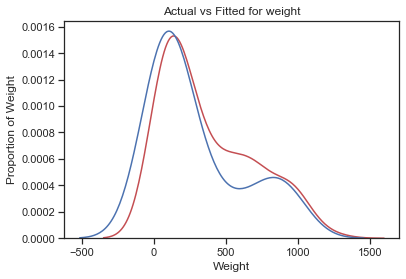

In [50]:
#distribution plot to compare actual vs predicted values for km/lit after few modification.
ax1=sns.distplot(df['Weight'],hist=False,color='r',label='Actual Value')
sns.distplot(yhat_pr,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for weight')
plt.xlabel('Weight')
plt.ylabel('Proportion of Weight')
plt.show()

<h3>Conclusion :</h3>

 From the above results Score/Accuracy of the model shows 99.18 and can used as good model.

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


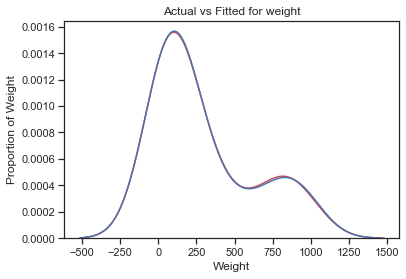

In [51]:
#distribution plot to compare actual vs predicted values for km/lit after few modification.
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(yhat_pr,hist=False,color='b',label='fitted Values',ax=ax1)
plt.title('Actual vs Fitted for weight')
plt.xlabel('Weight')
plt.ylabel('Proportion of Weight')
plt.show()

In [52]:
x_train_sm=x_train
# Unlike SKLearn, statsmodels don't automatically fit a constant,
# So you need to use method sm.add_constant(x) in order to add a constant.
x_train_sm=sm.add_constant(x_train_sm)
# Create  a fitted model in one line.
model_1=sm.OLS(y_train,x_train_sm).fit()

# Print the coefficients
model_1.params

array([-545.73128017,   24.20042656,   57.34597807,   18.17094842,
        -56.2005679 ,   51.9736617 ,   32.16211838])

In [53]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     202.1
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.71e-59
Time:                        14:41:37   Log-Likelihood:                -738.99
No. Observations:                 124   AIC:                             1492.
Df Residuals:                     117   BIC:                             1512.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -545.7313     42.930    -12.712      0.0

## Ridge regression

In [54]:
#Split data into train and test format
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=7)

In [55]:
RidgeModel=Ridge(alpha=0.1)

In [56]:
RidgeModel.fit(x_train2,y_train2)

Ridge(alpha=0.1)

In [57]:
yhat_Ridge =RidgeModel.predict(x_test2)

In [58]:
print('Predicted',yhat_Ridge[0:4])

Predicted [144.45259637  12.73280452  87.96479308 530.59443414]


In [59]:
print('Test set Values',y_test[0:4])

Test set Values [110.  70.  78. 500.]


In [60]:
print('R Squared using Polynomial Regression:',r2_score(y_test2,yhat_Ridge))
print('Mean Squared errorusing Polynomial Regerssion:',mean_squared_error(y_test2,yhat_Ridge))
print('Root mean Squared error using Polynomial Regression:',np.sqrt(mean_squared_error(y_test2,yhat_Ridge)))

R Squared using Polynomial Regression: 0.9093854989384698
Mean Squared errorusing Polynomial Regerssion: 8944.886273788437
Root mean Squared error using Polynomial Regression: 94.57740889762437


C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

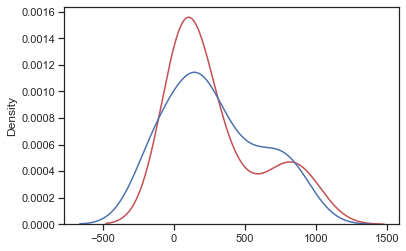

In [61]:
#distribution plot to compare actual vs predicted values for price after few modification.
ax1=sns.distplot(y_test2,hist=False,color='r',label='Actual Value')
sns.distplot(yhat_Ridge,hist=False,color='b',label='fitted Values',ax=ax1)

## To Improve the Models we again go for the transformation into Ridge Regression But it does not improve the model.

<h3>Q.4</h3> What is the mean score of the model at 95% confidence 
interval?

In [85]:
def get_prediction_interval(prediction, y_test, y_pred, pi=.95):

    '''
Get a prediction interval for a linear regression.
INPUTS:
- Single prediction,
- y_test
- All test set predictions,
- Prediction interval threshold (default = .95)
OUTPUT:
- Prediction interval for single prediction
 '''

In [86]:
#get standard deviation of y_test
sum_errs = np.sum((y_test - y_pred)**2)
stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)

In [88]:
#get interval from standard deviation
one_minus_pi = 1 - .95
ppf_lookup = 1 - (one_minus_pi / 2)
z_score = stats.norm.ppf(ppf_lookup)
interval = z_score * stdev

In [ ]:
#generate prediction interval lower and upper bound cs_24
lower, upper = prediction - interval, prediction + interval
return lower, prediction, upper

In [ ]:
## Plot and save confidence interval of linear regression  - 95% cs_24
lower_vet = []
upper_vet = []
for i in y_pred:
lower, prediction, upper =  get_prediction_interval(i, y, y_pred)
lower_vet.append(lower)
upper_vet.append(upper)
plt.fill_between(np.arange(0,len(y),1),upper_vet, lower_vet, color='b',label='Confidence Interval')
plt.plot(np.arange(0,len(y),1),y,color='orange',label='Real data')
plt.plot(y_pred,'k',label='Linear regression')
plt.xlabel('Ciclos')
plt.ylabel('Volts x seconds')
plt.title('95% confidence interval')
plt.legend()
plt.ylim(-1000,8000)
plt.show()

In [62]:
len(y_test)

32

Text(0.5, 0.98, 'Actual and Predicted')

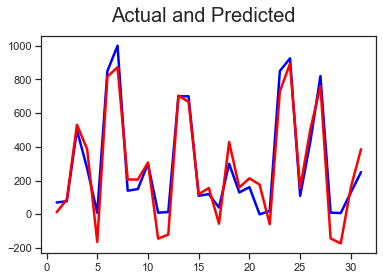

In [63]:
# Actual vs Predicted
# Check For the first 150 Observations

c=[i  for i in range(1,32,1)]
fig=plt.figure()
plt.plot(c,y_test[1:32],color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred[1:32],color="red",linewidth=2.5,linestyle="-")
fig.suptitle('Actual and Predicted',fontsize=20)        #plot Heading